In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Xopt class, GPT CBETA DC GUN example

This is the class method for running Xopt.

In [2]:
from xopt import Xopt

# Notebook printing output
from xopt import output_notebook
output_notebook()

In [3]:
import yaml

# Make a proper input file. 

YAML="""
xopt:
    output_path: null
  
algorithm:
  name: cnsga
  options: {max_generations: 16, population_size: 24, crossover_probability: 0.9, mutation_probability: 1.0,
  selection: auto, show_progress: True, population: null}

simulation:
  name: gpt_with_distgen
  function: gpt.gpt_distgen.evaluate_gpt_with_distgen
  options:
    gpt_input_file: ../templates/cbeta_dcgun/cbeta_dcgun_gpt.in
    distgen_input_file: ../templates/cbeta_dcgun/cbeta_dcgun_distgen.yaml
      

# Note that you can call another file in the top level group:
vocs: ../templates/cbeta_dcgun/cbeta_dcgun_vocs.yaml

"""
config = yaml.safe_load(YAML)

In [4]:
# Create object
X = Xopt(config=config)

# Show config
X

Loading config from dict.
Loading config from dict.
Loading config from dict.
Loading config from dict.
Loading from YAML file: ../templates/cbeta_dcgun/cbeta_dcgun_vocs.yaml
`name` keyword no longer allowed in vocs config, removing
`description` keyword no longer allowed in vocs config, removing



            Xopt 
________________________________           
Version: 0.4.3+171.g6a7a693.dirty
Configured: True
Config as YAML:
xopt: {output_path: null}
algorithm:
  name: cnsga
  options: {max_generations: 16, population_size: 24, crossover_probability: 0.9,
    mutation_probability: 1.0, selection: auto, show_progress: true, population: null,
    seed: null, verbose: null}
  function: xopt.cnsga.cnsga
simulation:
  name: gpt_with_distgen
  function: gpt.gpt_distgen.evaluate_gpt_with_distgen
  options:
    gpt_input_file: /Users/chrisonian/Code/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_gpt.in
    distgen_input_file: /Users/chrisonian/Code/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_distgen.yaml
    archive_path: null
    merit_f: null
    workdir: null
    use_tempdir: true
    gpt_bin: /Users/chrisonian/Code/xgpt/gpt321MacOSX/bin/gpt
    timeout: 2500
    auto_phase: false
    verbose: false
    gpt_verbose: false
    asci2gdf_bin: /Users/chrisonian/Code/xg

In [5]:
# Check vocs
X.vocs

{'variables': {'r_dist:sigma_xy:value': [0.0, 10],
  'r_dist:alpha:value': [0.1, 1.0],
  't_dist:sigma_t:value': [0.0, 0.57],
  't_dist:alpha:value': [0.0, 1.0],
  'total_charge:value': [0.0, 5.0],
  'sol_1_current': [0.0, 5.0]},
 'constants': {'n_particle': 200, 'gun_voltage': 375},
 'objectives': {'end_total_charge': 'MAXIMIZE', 'end_norm_emit_x': 'MINIMIZE'},
 'constraints': {'end_n_particle_loss': ['LESS_THAN', 1]},
 'linked_variables': None}

In [6]:
# Check random inputs
X.random_inputs()

{'r_dist:sigma_xy:value': 2.6434711241463082,
 'r_dist:alpha:value': 0.641163194206273,
 't_dist:sigma_t:value': 0.2359125100339022,
 't_dist:alpha:value': 0.681069059210294,
 'total_charge:value': 0.04558362600165011,
 'sol_1_current': 1.4972625666708756,
 'n_particle': 200,
 'gun_voltage': 375}

In [7]:
?X.random_evaluate

Signature: X.random_evaluate(check_vocs=True)
Docstring:
Makes random inputs and runs evaluate.

If check_vocs, will check that all keys in vocs constraints and objectives
are in output.
File:      ~/Code/GitHub/xopt/xopt/xopt.py
Type:      method


In [8]:
%%time
# Do a random evaluate to check that everything will run
x=X.random_evaluate(check_vocs=True)
print(x)

Could no parse: Map2D_B("wcs", XSLA01,YSLA01,ZSLA01,  cos(THXSLA01),0,sin(THXSLA01), 0,1,0, "fields/solenoid_SLA_L60.gdf", "R", "Z", "Br", "Bz", BSLA01);
{'error': False, 'end_n_particle': 200, 'end_norm_emit_x': 2.336658932399305e-05, 'end_norm_emit_y': 2.283478973066919e-05, 'end_higher_order_energy_spread': 1012.0269863957863, 'end_mean_x': 2.511693193638801e-05, 'end_sigma_x': 0.011515843599994803, 'end_min_x': -0.025090111401920277, 'end_max_x': 0.02505271721713728, 'end_mean_y': 3.781309108373097e-05, 'end_sigma_y': 0.011451655463196604, 'end_min_y': -0.02587819637067267, 'end_max_y': 0.024467107290988232, 'end_mean_z': 0.9220000000000002, 'end_sigma_z': 1.3866681133119837e-16, 'end_min_z': 0.9219999999999998, 'end_max_z': 0.9220000000000003, 'end_mean_r': 0.014853153249406824, 'end_sigma_r': 0.006568178279177922, 'end_min_r': 0.0004452092231093064, 'end_max_r': 0.02689848055208645, 'end_mean_theta': -0.03584437214760989, 'end_sigma_theta': 1.8236498055723187, 'end_min_theta': -3

In [9]:
X.vocs['constraints']

{'end_n_particle_loss': ['LESS_THAN', 1]}

In [10]:
# These are the algorithm options
X.algorithm['options']

{'max_generations': 16,
 'population_size': 24,
 'crossover_probability': 0.9,
 'mutation_probability': 1.0,
 'selection': 'auto',
 'show_progress': True,
 'population': None,
 'seed': None,
 'verbose': None}

In [11]:
# These are the options in the evaluate function
X.simulation['options']

{'gpt_input_file': '/Users/chrisonian/Code/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_gpt.in',
 'distgen_input_file': '/Users/chrisonian/Code/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_distgen.yaml',
 'archive_path': None,
 'merit_f': None,
 'workdir': None,
 'use_tempdir': True,
 'gpt_bin': '/Users/chrisonian/Code/xgpt/gpt321MacOSX/bin/gpt',
 'timeout': 2500,
 'auto_phase': False,
 'verbose': False,
 'gpt_verbose': False,
 'asci2gdf_bin': '/Users/chrisonian/Code/xgpt/gpt321MacOSX/bin/asci2gdf',
 'kill_msgs': ['gpt: Spacecharge3Dmesh:',
  'Error:',
  'gpt: No valid GPT license',
  'malloc',
  'Segmentation fault']}

# Run CNSGA using processes or threads

In [12]:
from concurrent.futures import ProcessPoolExecutor as PoolExecutor
#from concurrent.futures import ThreadPoolExecutor as PoolExecutor
executor = PoolExecutor()

In [13]:
X.run(executor=executor)

Starting at time 2021-09-27T20:51:36-07:00

    
    
     ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
    ▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
    ▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
    ▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
    ▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
    ░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
      ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
    ░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
    ░ ░               ░       ░        ░       ░  ░
    ░                                              
    
    
    Continuous Non-dominated Sorting Genetic Algorithm
    Version 0.4.3+171.g6a7a693.dirty
    
Creating toolbox from vocs.
Created toolbox with 6 variables, 1 constraints, and 2 objectives.
    Using selection algorithm: nsga2
Initializing with a new population, size 24
Maximum generations: 16
____________________________________________________
24 fitness calculations for initial generation
done.
Submitting fi

  0%|          | 0/24 [00:00<?, ?it/s]

Exception caught in cnsga_evaluate


  0%|          | 0/24 [00:00<?, ?it/s]

Generation 0 completed in 0.38846 minutes


Exception caught in cnsga_evaluate


  0%|          | 0/24 [00:00<?, ?it/s]

Generation 1 completed in 0.40131 minutes


  0%|          | 0/24 [00:00<?, ?it/s]

Generation 2 completed in 0.45273 minutes


  0%|          | 0/24 [00:00<?, ?it/s]

Generation 3 completed in 0.72994 minutes


  0%|          | 0/24 [00:00<?, ?it/s]

Generation 4 completed in 0.76811 minutes


  0%|          | 0/24 [00:00<?, ?it/s]

Generation 5 completed in 0.88364 minutes


  0%|          | 0/24 [00:00<?, ?it/s]

Generation 6 completed in 0.96814 minutes


  0%|          | 0/24 [00:00<?, ?it/s]

Generation 7 completed in 0.87122 minutes


  0%|          | 0/24 [00:00<?, ?it/s]

Generation 8 completed in 0.96427 minutes


  0%|          | 0/24 [00:00<?, ?it/s]

Generation 9 completed in 1.10463 minutes


  0%|          | 0/24 [00:00<?, ?it/s]

Generation 10 completed in 1.22060 minutes


  0%|          | 0/24 [00:00<?, ?it/s]

Generation 11 completed in 1.03390 minutes


  0%|          | 0/24 [00:00<?, ?it/s]

Generation 12 completed in 1.04659 minutes


  0%|          | 0/24 [00:00<?, ?it/s]

Generation 13 completed in 1.49504 minutes


  0%|          | 0/24 [00:00<?, ?it/s]

Generation 14 completed in 1.00490 minutes


  0%|          | 0/24 [00:00<?, ?it/s]

Generation 15 completed in 1.11415 minutes


# Ouput
The last generation, as well as important simulation data is saved in xopt.population:

In [14]:
print('Available population data:',list(X.results.keys()))
print('See which individuals had errors:', X.results['error'])

Available population data: ['variables', 'generation', 'vocs', 'error', 'inputs', 'outputs']
See which individuals had errors: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


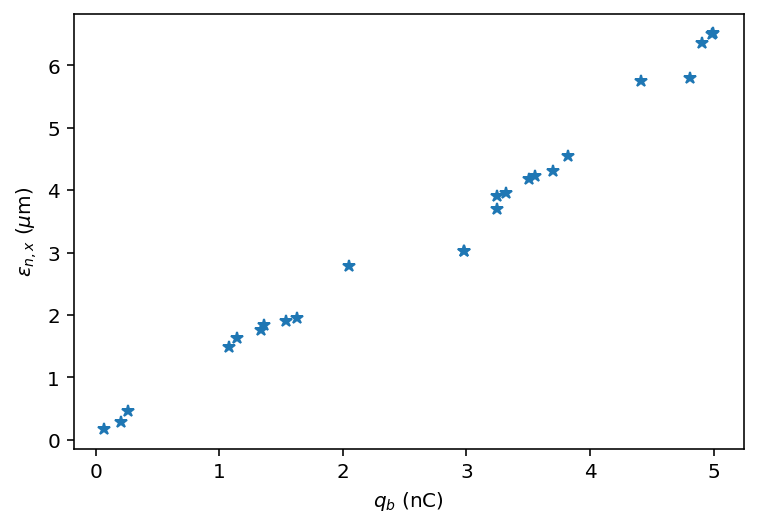

In [15]:
from matplotlib import pyplot as plt
import matplotlib 
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

qs =  np.array([indin['total_charge:value'] for indin in X.results['inputs']])
ens = np.array([indout['end_norm_emit_x'] for indout in X.results['outputs']])*1e6

plt.plot(qs, ens, '*')
plt.xlabel('$q_b$ (nC)')
plt.ylabel('$\epsilon_{n,x}$ ($\mu$m)');

# Write this configuration

In [16]:
X.save('test.yaml')

Config written as YAML to test.yaml


In [17]:
!cat test.yaml

xopt: {output_path: null}
algorithm:
  name: cnsga
  options: {max_generations: 16, population_size: 24, crossover_probability: 0.9,
    mutation_probability: 1.0, selection: auto, show_progress: true, population: null,
    seed: null, verbose: null}
  function: xopt.cnsga.cnsga
simulation:
  name: gpt_with_distgen
  function: gpt.gpt_distgen.evaluate_gpt_with_distgen
  options:
    gpt_input_file: /Users/chrisonian/Code/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_gpt.in
    distgen_input_file: /Users/chrisonian/Code/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_distgen.yaml
    archive_path: null
    merit_f: null
    workdir: null
    use_tempdir: true
    gpt_bin: /Users/chrisonian/Code/xgpt/gpt321MacOSX/bin/gpt
    timeout: 2500
    auto_phase: false
    verbose: false
    gpt_verbose: false
    asci2gdf_bin: /Users/chrisonian/Code/xgpt/gpt321MacOSX/bin/asci2gdf
    kill_msgs: ['gpt: Spacecharge3Dmesh:', 'Error:', 'gpt: No valid GPT license',
      malloc, Segme

# Run with MPI

In [ ]:
!mpirun -n 4 python -m mpi4py.futures -m xopt.mpi.run test.yaml

# Dask 

In [ ]:
from dask.distributed import Client
executor = Client()
executor

In [ ]:
# Wait a few seconds for the Dask cluster to start
from time import sleep
sleep(5)

In [ ]:
# Increase the number of generations
X.algorithm['options']['max_generations'] = 7
X.run(executor=executor)

In [ ]:
X.population.keys()

# Cleanup

In [ ]:
!rm -r dask-worker-space

In [ ]:
!rm test.yaml